In [1]:
# Dependencies
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import torch

from src.transforms import AddGaussianNoise
from src.transforms import AddSaltPepperNoise
from src.transforms import ClampTensor

import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

%matplotlib inline

In [2]:
# Define random seed
RANDOM_SEED = 42

# Set random seed
np.random.seed(RANDOM_SEED)

In [3]:
# MNIST dataset
MNIST_DIR_PATH = './data'  # MNIST dataset directory
MNIST_DOWNLOAD = True  # Enable MNIST download/overwrite

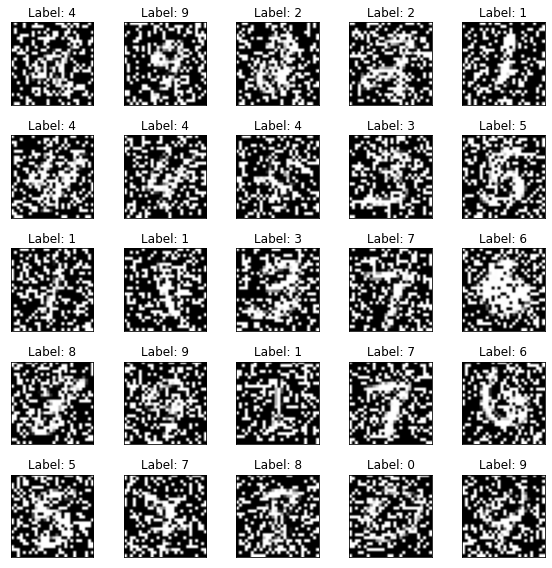

In [4]:
# Load/download MNIST dataset

# Define a common transformer pipeline for both test and train dataset
mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    # AddGaussianNoise(mean=0.0, std=1.0),
    AddSaltPepperNoise(percentage=0.7),
    ClampTensor(scale=(0.0, 1.0))
])

# Train dataset
train_ds = MNIST(MNIST_DIR_PATH, train=True, download=MNIST_DOWNLOAD, transform=mnist_transform)

# Test dataset
test_ds = MNIST(MNIST_DIR_PATH, train=False, download=MNIST_DOWNLOAD, transform=mnist_transform)

# Show some sample of training dataset
fig, axs = plt.subplots(5, 5, figsize=(8,8))
# Loop through each subplot
for ax in axs.flatten():
    img, label = train_ds[np.random.choice(len(train_ds))]  # Get an image and the corresponding label
    ax.imshow(img.squeeze().numpy(), cmap='gist_gray')  # Show grayscale image
    ax.set_title('Label: %d' % label)  # Show label in title
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
plt.tight_layout()